In [3]:
import pandas as pd
import numpy as np
pd.set_option('max_columns', None)
pd.set_option('max_rows',10)
pd.set_option("precision",2)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 16))
import scipy.stats as stats
import re

<Figure size 1296x1152 with 0 Axes>

In [13]:
df= pd.read_csv("training_data.csv")

In [5]:

test = pd.read_csv("(sanyuja)_score.csv")

In [163]:
test

,id,diagnosis_date,gleason_score,t_score,n_score,m_score,stage,age,race,height,weight,family_history,first_degree_history,previous_cancer,smoker,side,tumor_diagnosis,tumor_6_months,tumor_1_year,psa_diagnosis,psa_6_months,psa_1_year,tea,symptoms,rd_thrpy,h_thrpy,chm_thrpy,cry_thrpy,brch_thrpy,rad_rem,multi_thrpy,survival_1_year,survival_7_years
0,20001,Oct-05,8.0,T3b,N0,M0,III,79.0,4.0,68.0,167.0,NaN,NaN,NaN,NaN,both,44.0,49.0,NaN,NaN,8.5,NaN,NaN,"U01,U02,S10",1,1,1,0,0,0,1,NaN,NaN
1,20002,Jun-02,10.0,T2c,N0,M0,IIB,84.0,2.0,70.0,169.0,0.0,0.0,0.0,0.0,both,93.0,NaN,109.0,7.0,NaN,8.2,2.0,"U01,U02,S07",1,0,0,1,0,0,1,NaN,NaN
2,20003,Mar-04,6.0,T4,N0,M0,IV,NaN,4.0,68.0,160.0,0.0,0.0,0.0,0.0,both,35.0,NaN,24.0,9.6,NaN,6.3,4.0,"U06,S07,O11",0,0,1,1,0,0,1,NaN,NaN
3,20004,Oct-03,7.0,T4,N1,M1a,IV,73.0,4.0,69.0,164.0,0.0,0.0,0.0,0.0,left,40.0,NaN,NaN,5.3,NaN,NaN,1.0,"S07,P03",1,0,1,0,1,0,1,0.0,NaN
4,20005,Mar-06,6.0,T1b,N0,M0,IIA,81.0,1.0,69.0,NaN,0.0,0.0,0.0,0.0,left,53.0,NaN,31.0,10.0,NaN,4.2,1.0,"U01,U03,U06,O11",0,0,1,1,0,0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11526,31527,Sep-06,10.0,T4,N1,M0,IV,80.0,4.0,70.0,199.0,NaN,NaN,NaN,NaN,both,68.0,64.0,68.0,24.0,23.6,24.1,NaN,"U01,U02,U06,S07",0,1,1,1,0,0,1,1.0,NaN
11527,31528,Nov-02,7.0,T4,N1,M0,IV,73.0,3.0,69.0,165.0,0.0,0.0,0.0,0.0,both,43.0,NaN,18.0,8.8,NaN,3.5,1.0,"U01,U02,U03,U06",0,1,1,0,0,0,1,1.0,NaN
11528,31529,Oct-02,10.0,T4,N0,M0,IV,62.0,4.0,NaN,213.0,0.0,0.0,0.0,0.0,both,61.0,58.0,63.0,12.3,10.4,10.3,1.0,"U01,U03,U05,S04",1,0,1,0,0,0,1,1.0,NaN
11529,31530,Nov-01,10.0,T1a,N0,M0,IIB,78.0,4.0,67.0,149.0,0.0,0.0,0.0,0.0,both,60.0,NaN,53.0,14.4,NaN,10.8,6.0,U02,1,1,1,1,0,1,1,NaN,NaN


In [137]:
df

,id,diagnosis_date,gleason_score,t_score,n_score,m_score,stage,age,race,height,weight,family_history,first_degree_history,previous_cancer,smoker,side,tumor_diagnosis,tumor_6_months,tumor_1_year,psa_diagnosis,psa_6_months,psa_1_year,tea,symptoms,rd_thrpy,h_thrpy,chm_thrpy,cry_thrpy,brch_thrpy,rad_rem,multi_thrpy,survival_1_year,survival_7_years
0,1,Jun-05,4.0,T1c,N0,M0,I,86.0,4.0,66.0,158.0,0.0,0.0,0.0,0.0,both,70.0,NaN,39.0,8.7,NaN,4.2,2.0,U03,0,0,1,1,0,1,1,1,0
1,2,Feb-06,8.0,T3a,N1,M0,IV,66.0,2.0,70.0,174.0,0.0,0.0,0.0,1.0,both,43.0,28.0,16.0,13.7,9.8,7.5,4.0,"U06,S07",1,1,1,0,0,0,1,1,0
2,3,Mar-06,9.0,T1a,N0,M0,IIB,84.0,4.0,69.0,NaN,0.0,0.0,0.0,0.0,right,51.0,NaN,89.0,16.0,15.9,18.5,0.0,"U01,U02,U03,S10",1,1,0,0,1,1,1,1,1
3,4,Feb-05,8.0,T2b,N0,M0,IIB,86.0,3.0,69.0,173.0,0.0,0.0,0.0,0.0,right,104.0,NaN,NaN,NaN,NaN,NaN,2.0,"U01,U02,S10,O11",0,0,0,1,0,1,1,0,0
4,5,Dec-01,8.0,T4,N0,M0,IV,78.0,4.0,70.0,201.0,1.0,1.0,0.0,0.0,left,72.0,NaN,87.0,18.1,NaN,NaN,2.0,"U01,U03,U05,S07",1,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15380,15381,Jun-05,7.0,T3c,N0,M0,III,72.0,4.0,70.0,178.0,0.0,0.0,0.0,0.0,left,51.0,17.0,NaN,8.5,2.4,NaN,2.0,"U03,S07",0,0,1,0,1,0,1,0,0
15381,15382,Dec-04,7.0,T4,N0,M0,IV,77.0,4.0,NaN,205.0,0.0,0.0,0.0,0.0,both,87.0,NaN,65.0,6.1,NaN,0.0,2.0,"U02,S07,O11",1,0,0,0,0,0,0,1,0
15382,15383,Jan-01,8.0,T3c,N0,M0,III,64.0,4.0,NaN,174.0,2.0,2.0,0.0,1.0,right,32.0,NaN,15.0,12.8,NaN,NaN,1.0,"U01,U03",1,1,0,0,0,0,1,1,0
15383,15384,Jan-03,10.0,T4,N1,M1a,IV,79.0,4.0,69.0,177.0,0.0,0.0,0.0,0.0,left,NaN,35.0,42.0,14.0,12.3,12.6,2.0,"S04,P01",0,1,1,1,1,0,1,1,0


In [119]:
df.dtypes

id                    int64
diagnosis_date       object
gleason_score       float64
t_score              object
n_score              object
                     ...   
brch_thrpy            int64
rad_rem               int64
multi_thrpy           int64
survival_1_year       int64
survival_7_years      int64
Length: 33, dtype: object

In [350]:
df.tail()

,diagnosis_date,gleason_score,t_score,n_score,m_score,stage,age,race,height,weight,family_history,first_degree_history,previous_cancer,smoker,side,tumor_diagnosis,tumor_6_months,tumor_1_year,psa_diagnosis,psa_6_months,psa_1_year,tea,symptoms,rd_thrpy,h_thrpy,chm_thrpy,cry_thrpy,brch_thrpy,rad_rem,multi_thrpy,survival_1_year,survival_7_years,BMI
15380,Jun-05,7.0,T3c,N0,M0,III,72.0,4.0,70.0,178.0,0.0,0.0,0.0,0.0,left,51.0,17.0,NaN,8.5,2.4,NaN,2.0,"U03,S07",0,0,1,0,1,0,1,0,0,0.04
15381,Dec-04,7.0,T4,N0,M0,IV,77.0,4.0,NaN,205.0,0.0,0.0,0.0,0.0,both,87.0,NaN,65.0,6.1,NaN,0.0,2.0,"U02,S07,O11",1,0,0,0,0,0,0,1,0,NaN
15382,Jan-01,8.0,T3c,N0,M0,III,64.0,4.0,NaN,174.0,2.0,2.0,0.0,1.0,right,32.0,NaN,15.0,12.8,NaN,NaN,1.0,"U01,U03",1,1,0,0,0,0,1,1,0,NaN
15383,Jan-03,10.0,T4,N1,M1a,IV,79.0,4.0,69.0,177.0,0.0,0.0,0.0,0.0,left,NaN,35.0,42.0,14.0,12.3,12.6,2.0,"S04,P01",0,1,1,1,1,0,1,1,0,0.04
15384,Jan-04,9.0,T3b,N0,M0,III,81.0,4.0,70.0,173.0,0.0,0.0,0.0,0.0,right,56.0,NaN,16.0,9.7,7.6,7.2,1.0,U01,1,1,0,0,0,0,1,1,1,0.04


In [174]:
# Convert all the following into categorical variables: 
df['race'] = df['race'].astype("object")
df['family_history'] = df['family_history'].astype('object')
df['first_degree_history'] = df['first_degree_history'].astype('object')
df['previous_cancer'] = df['previous_cancer'].astype('object')
df['smoker'] = df['smoker'].astype('object')
df['rd_thrpy'] = df['rd_thrpy'].astype('object')
df['h_thrpy'] = df['h_thrpy'].astype('object')
df['chm_thrpy'] = df['chm_thrpy'].astype('object')
df['cry_thrpy'] = df['cry_thrpy'].astype('object')
df['brch_thrpy'] = df['brch_thrpy'].astype('object')
df['rad_rem'] = df['rad_rem'].astype('object')
df['rd_thrpy'] = df['rd_thrpy'].astype('object')
df['multi_thrpy'] = df['multi_thrpy'].astype('object')
df['survival_1_year'] = df['survival_1_year'].astype('object')
df['survival_7_years'] = df['survival_7_years'].astype('object')

df.drop(['id'], axis=1, inplace=True)

# new variables added: 

df['BMI'] = df['weight']/(df['height'] * df['height'])

In [164]:
test['race'] = test['race'].astype("object")
test['family_history'] = test['family_history'].astype('object')
test['first_degree_history'] = test['first_degree_history'].astype('object')
test['previous_cancer'] = test['previous_cancer'].astype('object')
test['smoker'] = test['smoker'].astype('object')
test['rd_thrpy'] = test['rd_thrpy'].astype('object')
test['h_thrpy'] = test['h_thrpy'].astype('object')
test['chm_thrpy'] = test['chm_thrpy'].astype('object')
test['cry_thrpy'] = test['cry_thrpy'].astype('object')
test['brch_thrpy'] = test['brch_thrpy'].astype('object')
test['rad_rem'] = test['rad_rem'].astype('object')
test['rd_thrpy'] = test['rd_thrpy'].astype('object')
test['multi_thrpy'] = test['multi_thrpy'].astype('object')
test['survival_1_year'] = test['survival_1_year'].astype('object')
test['survival_7_years'] = test['survival_7_years'].astype('object')

test.drop(['id'], axis=1, inplace=True)

# new variables added: 

test['BMI'] = test['weight']/(test['height'] * test['height'])

## Symptoms:

There are symtoms coded as U,P,S & O with the numbers that show the type of symptom and the severity. I will be making separate columns for each symptom type and add the numbers associated to produce a score. 

In [175]:
u_symptom = []
s_symptom = []
p_symptom = []
o_symptom = []
for x in df['symptoms'].fillna("0"):
    u_symptom.append(str(re.findall(r'\bU\w+', x)))
    s_symptom.append(str(re.findall(r'\bS\w+', x)))
    p_symptom.append(str(re.findall(r'\bP\w+', x)))
    o_symptom.append(str(re.findall(r'\bO\w+', x)))
df['u_symptom'] = u_symptom 
df['s_symptom'] = s_symptom  
df['p_symptom'] = p_symptom  
df['o_symptom'] = o_symptom  
df['u_symptom'] = df.u_symptom.apply(lambda y: (re.findall(r'(\d+)',y)))
df['s_symptom'] = df.s_symptom.apply(lambda y: re.findall(r'(\d+)',y))   
df['p_symptom'] = df.p_symptom.apply(lambda y: re.findall(r'(\d+)',y))
df['o_symptom'] = df.o_symptom.apply(lambda y: re.findall(r'(\d+)',y))

u_score = []
for x in range(0, len(df.u_symptom)):
    l=[]
    for y in range(0, len(df['u_symptom'][x])):
        l.append(int(df['u_symptom'][x][y]))
    u_score.append(sum(l))     
p_score = []
for x in range(0, len(df.p_symptom)):
    l=[]
    for y in range(0, len(df['p_symptom'][x])):
        l.append(int(df['p_symptom'][x][y]))
    p_score.append(sum(l))    
s_score = []
for x in range(0, len(df.s_symptom)):
    l=[]
    for y in range(0, len(df['s_symptom'][x])):
        l.append(int(df['s_symptom'][x][y]))
    s_score.append(sum(l))    
o_score = []
for x in range(0, len(df.o_symptom)):
    l=[]
    for y in range(0, len(df['o_symptom'][x])):
        l.append(int(df['o_symptom'][x][y]))
    o_score.append(sum(l))    
    
df['u_symptom'] = u_score   
df['s_symptom'] = s_score 
df['p_symptom'] = p_score 
df['o_symptom'] = o_score 

In [165]:
u_symptom = []
s_symptom = []
p_symptom = []
o_symptom = []
for x in test['symptoms'].fillna("0"):
    u_symptom.append(str(re.findall(r'\bU\w+', x)))
    s_symptom.append(str(re.findall(r'\bS\w+', x)))
    p_symptom.append(str(re.findall(r'\bP\w+', x)))
    o_symptom.append(str(re.findall(r'\bO\w+', x)))
test['u_symptom'] = u_symptom 
test['s_symptom'] = s_symptom  
test['p_symptom'] = p_symptom  
test['o_symptom'] = o_symptom  
test['u_symptom'] = test.u_symptom.apply(lambda y: (re.findall(r'(\d+)',y)))
test['s_symptom'] = test.s_symptom.apply(lambda y: re.findall(r'(\d+)',y))   
test['p_symptom'] = test.p_symptom.apply(lambda y: re.findall(r'(\d+)',y))
test['o_symptom'] = test.o_symptom.apply(lambda y: re.findall(r'(\d+)',y))

u_score = []
for x in range(0, len(test.u_symptom)):
    l=[]
    for y in range(0, len(test['u_symptom'][x])):
        l.append(int(test['u_symptom'][x][y]))
    u_score.append(sum(l))     
p_score = []
for x in range(0, len(test.p_symptom)):
    l=[]
    for y in range(0, len(test['p_symptom'][x])):
        l.append(int(test['p_symptom'][x][y]))
    p_score.append(sum(l))    
s_score = []
for x in range(0, len(test.s_symptom)):
    l=[]
    for y in range(0, len(test['s_symptom'][x])):
        l.append(int(test['s_symptom'][x][y]))
    s_score.append(sum(l))    
o_score = []
for x in range(0, len(test.o_symptom)):
    l=[]
    for y in range(0, len(test['o_symptom'][x])):
        l.append(int(test['o_symptom'][x][y]))
    o_score.append(sum(l))    
    
test['u_symptom'] = u_score   
test['s_symptom'] = s_score 
test['p_symptom'] = p_score 
test['o_symptom'] = o_score 

In [140]:
test

,diagnosis_date,gleason_score,t_score,n_score,m_score,stage,age,race,height,weight,family_history,first_degree_history,previous_cancer,smoker,side,tumor_diagnosis,tumor_6_months,tumor_1_year,psa_diagnosis,psa_6_months,psa_1_year,tea,symptoms,rd_thrpy,h_thrpy,chm_thrpy,cry_thrpy,brch_thrpy,rad_rem,multi_thrpy,survival_1_year,survival_7_years,BMI,u_symptom,s_symptom,p_symptom,o_symptom
0,Oct-05,8.0,T3b,N0,M0,III,79.0,4.0,68.0,167.0,NaN,NaN,NaN,NaN,both,44.0,49.0,NaN,NaN,8.5,NaN,NaN,"U01,U02,S10",1,1,1,0,0,0,1,NaN,NaN,0.04,3,10,0,0
1,Jun-02,10.0,T2c,N0,M0,IIB,84.0,2.0,70.0,169.0,0.0,0.0,0.0,0.0,both,93.0,NaN,109.0,7.0,NaN,8.2,2.0,"U01,U02,S07",1,0,0,1,0,0,1,NaN,NaN,0.03,3,7,0,0
2,Mar-04,6.0,T4,N0,M0,IV,NaN,4.0,68.0,160.0,0.0,0.0,0.0,0.0,both,35.0,NaN,24.0,9.6,NaN,6.3,4.0,"U06,S07,O11",0,0,1,1,0,0,1,NaN,NaN,0.03,6,7,0,11
3,Oct-03,7.0,T4,N1,M1a,IV,73.0,4.0,69.0,164.0,0.0,0.0,0.0,0.0,left,40.0,NaN,NaN,5.3,NaN,NaN,1.0,"S07,P03",1,0,1,0,1,0,1,0.0,NaN,0.03,0,7,3,0
4,Mar-06,6.0,T1b,N0,M0,IIA,81.0,1.0,69.0,NaN,0.0,0.0,0.0,0.0,left,53.0,NaN,31.0,10.0,NaN,4.2,1.0,"U01,U03,U06,O11",0,0,1,1,0,0,1,NaN,NaN,NaN,10,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11526,Sep-06,10.0,T4,N1,M0,IV,80.0,4.0,70.0,199.0,NaN,NaN,NaN,NaN,both,68.0,64.0,68.0,24.0,23.6,24.1,NaN,"U01,U02,U06,S07",0,1,1,1,0,0,1,1.0,NaN,0.04,9,7,0,0
11527,Nov-02,7.0,T4,N1,M0,IV,73.0,3.0,69.0,165.0,0.0,0.0,0.0,0.0,both,43.0,NaN,18.0,8.8,NaN,3.5,1.0,"U01,U02,U03,U06",0,1,1,0,0,0,1,1.0,NaN,0.03,12,0,0,0
11528,Oct-02,10.0,T4,N0,M0,IV,62.0,4.0,NaN,213.0,0.0,0.0,0.0,0.0,both,61.0,58.0,63.0,12.3,10.4,10.3,1.0,"U01,U03,U05,S04",1,0,1,0,0,0,1,1.0,NaN,NaN,9,4,0,0
11529,Nov-01,10.0,T1a,N0,M0,IIB,78.0,4.0,67.0,149.0,0.0,0.0,0.0,0.0,both,60.0,NaN,53.0,14.4,NaN,10.8,6.0,U02,1,1,1,1,0,1,1,NaN,NaN,0.03,2,0,0,0


In [430]:
df.describe(include='O')

,diagnosis_date,t_score,n_score,m_score,stage,race,family_history,first_degree_history,previous_cancer,smoker,side,symptoms,rd_thrpy,h_thrpy,chm_thrpy,cry_thrpy,brch_thrpy,rad_rem,multi_thrpy,survival_1_year,survival_7_years,u_symptom,s_symptom,p_symptom,o_symptom
count,15385,15385,15385,15385,15385,15220.0,13799.0,13799.0,13799.0,13799.0,15385,14975,15385,15385,15385,15385,15385,15385,15385,15385,15385,15385,15385,15385,15385
unique,79,10,3,4,5,4.0,6.0,5.0,2.0,2.0,3,1174,2,2,2,2,2,2,2,2,2,32,8,4,27
top,Feb-06,T4,N0,M0,IV,4.0,0.0,0.0,0.0,0.0,both,"U01,U02",1,0,1,0,0,0,1,1,0,"[U01, U02]",0,0,0
freq,336,4133,9605,14172,6713,11413.0,8739.0,11148.0,12850.0,13041.0,7761,800,8269,10110,10207,11710,11615,12699,11979,13799,8734,2335,6529,14290,12475


In [5]:
df.describe()

,gleason_score,age,height,weight,tumor_diagnosis,tumor_6_months,tumor_1_year,psa_diagnosis,psa_6_months,psa_1_year,tea,BMI,u_symptom,s_symptom,p_symptom,o_symptom
count,15065.00,14637.00,14021.00,14068.00,15082.00,5322.00,13262.00,13987.00,5882.00,12868.00,13799.00,1.28e+04,15385.00,15385.00,15385.00,15385.00
mean,7.30,76.90,69.15,176.80,49.58,39.24,38.25,11.70,9.86,9.12,2.55,3.70e-02,4.47,4.38,0.11,2.03
std,1.93,9.62,1.13,17.21,17.95,25.70,32.66,4.17,4.95,6.05,1.62,3.12e-03,3.41,4.50,0.45,4.42
min,3.00,32.00,65.00,118.00,7.00,0.00,0.00,0.10,0.00,0.00,0.00,2.48e-02,0.00,0.00,0.00,0.00
25%,6.00,71.00,68.00,166.00,38.00,20.00,9.00,8.40,6.20,4.50,1.00,3.51e-02,2.00,0.00,0.00,0.00
50%,7.00,78.00,69.00,174.00,46.00,38.00,34.00,11.70,9.90,8.80,2.00,3.63e-02,3.00,4.00,0.00,0.00
75%,9.00,84.00,70.00,184.00,58.00,56.00,60.00,14.90,13.40,13.10,4.00,3.82e-02,6.00,7.00,0.00,0.00
max,14.00,107.00,73.00,343.00,195.00,190.00,225.00,31.00,30.60,35.00,12.00,7.20e-02,17.00,21.00,3.00,38.00


In [ ]:
(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

## Survied 7 years:

In [122]:
sur7 = df.groupby('survival_7_years').agg('mean')
sur7

,gleason_score,age,height,weight,tumor_diagnosis,tumor_6_months,tumor_1_year,psa_diagnosis,psa_6_months,psa_1_year,tea,BMI,u_symptom,s_symptom,p_symptom,o_symptom
survival_7_years,,,,,,,,,,,,,,,,
0,7.56,77.02,69.15,177.15,51.07,42.53,43.11,11.93,10.33,9.75,2.57,0.04,4.56,4.47,0.17,2.21
1,6.95,76.74,69.15,176.35,47.62,34.99,33.02,11.40,9.24,8.44,2.53,0.04,4.37,4.27,0.04,1.79


/Applications/anaconda/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.4 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Applications/anaconda/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.4 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Applications/anaconda/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.4 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Applications/anaconda/anaconda3/lib/python3.7/site-packages/

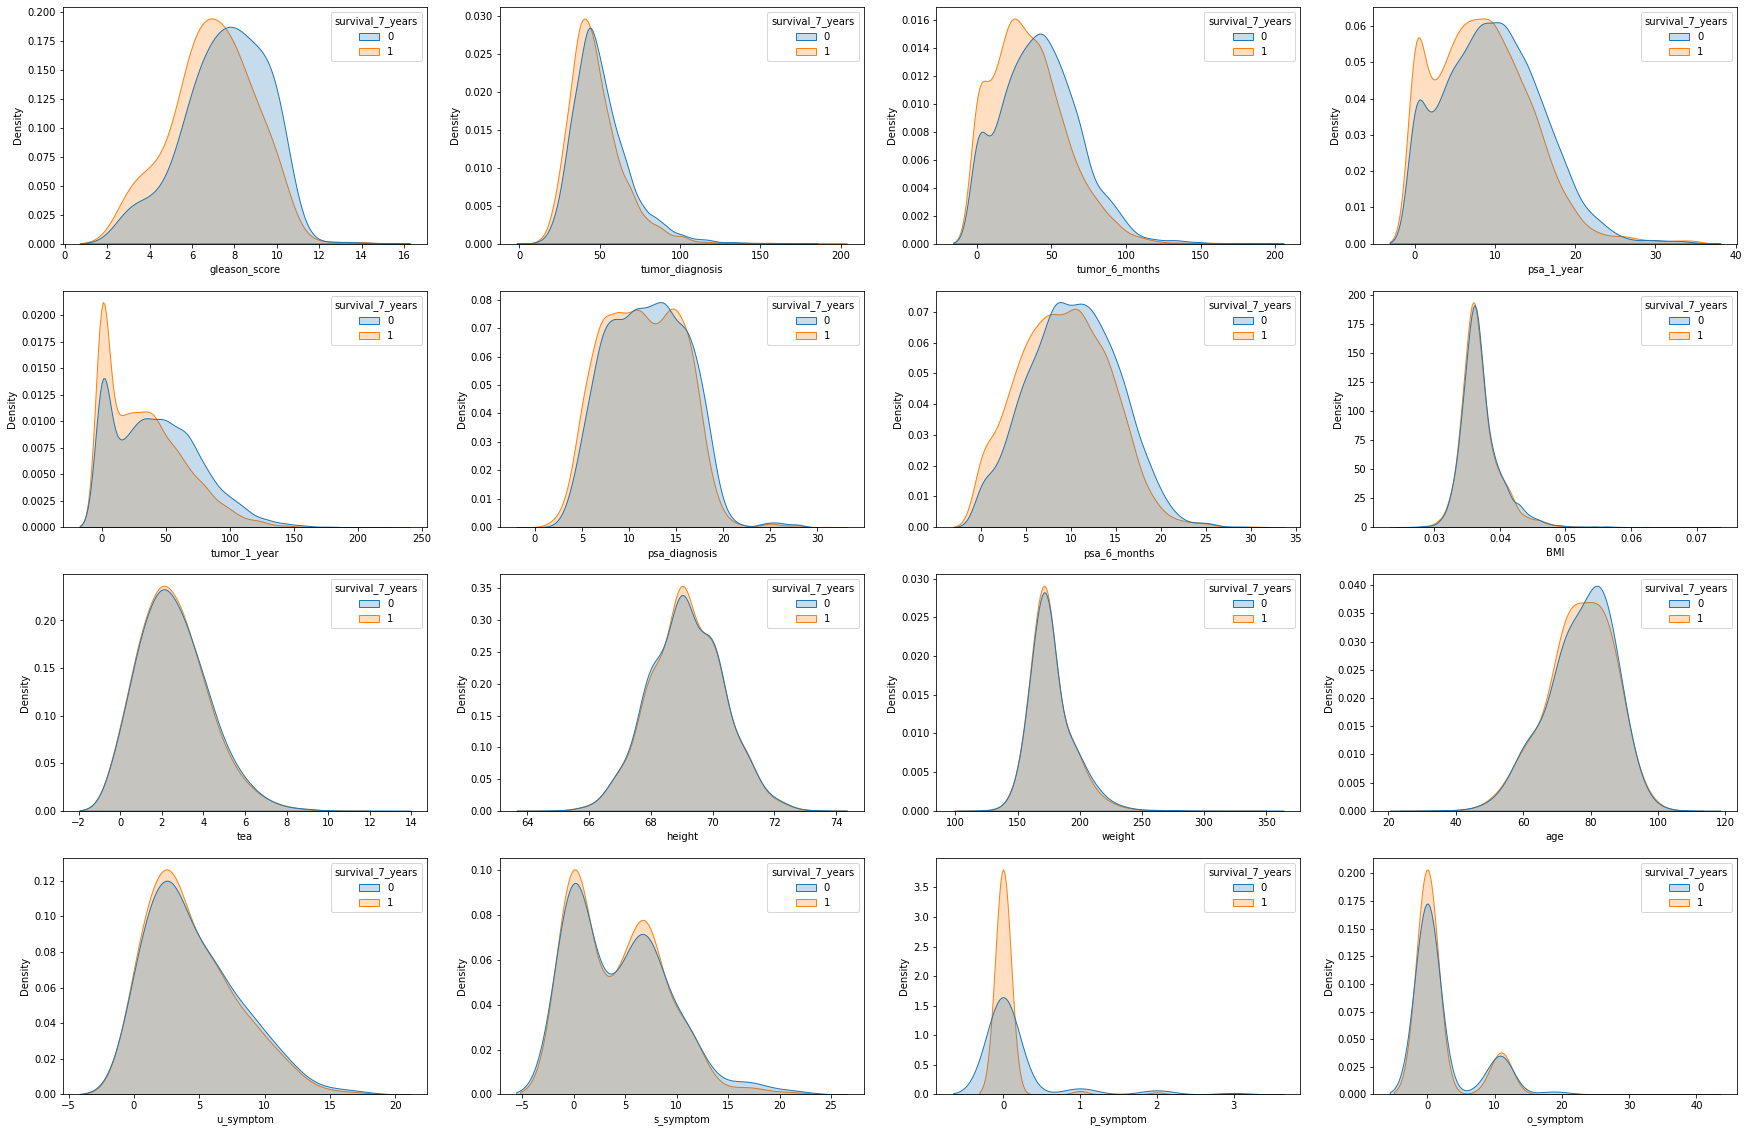

In [125]:
fig, ax =plt.subplots(4,4, figsize=(30,20))
sns.kdeplot(data=df ,x='gleason_score', hue=df['survival_7_years'], fill=True, common_norm=False, palette="tab10", bw=0.4,ax=ax[0,0])
sns.kdeplot(data=df ,x='tumor_diagnosis', hue=df['survival_7_years'], fill=True, common_norm=False, palette="tab10",ax=ax[0,1])
sns.kdeplot(data=df ,x='tumor_6_months', hue=df['survival_7_years'], fill=True, common_norm=False, palette="tab10",ax=ax[0,2])
sns.kdeplot(data=df ,x='tumor_1_year', hue=df['survival_7_years'], fill=True, common_norm=False, palette="tab10",ax=ax[1,0])
sns.kdeplot(data=df ,x='psa_diagnosis', hue=df['survival_7_years'], fill=True, common_norm=False, palette="tab10",ax=ax[1,1])
sns.kdeplot(data=df ,x='psa_6_months', hue=df['survival_7_years'], fill=True, common_norm=False, palette="tab10",ax=ax[1,2])
sns.kdeplot(data=df ,x='psa_1_year', hue=df['survival_7_years'], fill=True, common_norm=False, palette="tab10",ax=ax[0,3])
sns.kdeplot(data=df ,x='BMI', hue=df['survival_7_years'], fill=True, common_norm=False, palette="tab10",ax=ax[1,3])
sns.kdeplot(data=df ,x='tea', hue=df['survival_7_years'], fill=True, common_norm=False, palette="tab10", bw=0.4, ax=ax[2,0])
sns.kdeplot(data=df ,x='height', hue=df['survival_7_years'], fill=True, common_norm=False, palette="tab10", bw=0.4,ax=ax[2,1])
sns.kdeplot(data=df ,x='weight', hue=df['survival_7_years'], fill=True, common_norm=False, palette="tab10", bw=0.4,ax=ax[2,2])
sns.kdeplot(data=df ,x='age', hue=df['survival_7_years'], fill=True, common_norm=False, palette="tab10", bw=0.4,ax=ax[2,3])

sns.kdeplot(data=df ,x='u_symptom', hue=df['survival_7_years'], fill=True, common_norm=False, palette="tab10", bw=0.4,ax=ax[3,0])
sns.kdeplot(data=df ,x='s_symptom', hue=df['survival_7_years'], fill=True, common_norm=False, palette="tab10", bw=0.4,ax=ax[3,1])
sns.kdeplot(data=df ,x='p_symptom', hue=df['survival_7_years'], fill=True, common_norm=False, palette="tab10", bw=0.4,ax=ax[3,2])
sns.kdeplot(data=df ,x='o_symptom', hue=df['survival_7_years'], fill=True, common_norm=False, palette="tab10", bw=0.4,ax=ax[3,3])

plt.savefig('kdeplots7.png')

In [565]:
print("following continuous variables are significant:")
for x in sur7.columns:
    p = stats.f_oneway(df[df['survival_7_years']==1][x].dropna(), df[df['survival_7_years']==0][x].dropna()).pvalue
    if p < 0.05:
        print(x,p)

following continuous variables are significant:
gleason_score 5.743400063639784e-84
weight 0.0064341935531574915
tumor_diagnosis 7.503669578768576e-32
tumor_6_months 1.3430457165696373e-26
tumor_1_year 1.707195332743412e-71
psa_diagnosis 1.6330039002837205e-13
psa_6_months 2.865341505245209e-17
psa_1_year 1.5501365770940559e-34
u_symptom 0.0007438154376747263
s_symptom 0.006083987374967462
p_symptom 6.787950897637968e-74
o_symptom 8.106948243502624e-09
BMI 0.00310793294919987


In [270]:
#get contingency tables for all categorical varibales : 

for column in df.select_dtypes('object').drop(['symptoms','diagnosis_date','survival_7_years'],axis=1).columns:
    (pd.crosstab(df[column], df['survival_7_years'])).to_csv(f'{column}.csv')

In [566]:
print("following categorical variables are significant:")
for column in df.select_dtypes('object').drop(['symptoms','diagnosis_date','survival_7_years'],axis=1).columns:
    p = (stats.chi2_contingency(pd.crosstab(df[column], df['survival_7_years']).values))[1]
    if p <0.05:
        print(p,column)

following categorical variables are significant:
t_score
n_score
m_score
stage
race
first_degree_history
previous_cancer
rd_thrpy
h_thrpy
chm_thrpy
cry_thrpy
brch_thrpy
rad_rem
multi_thrpy
survival_1_year


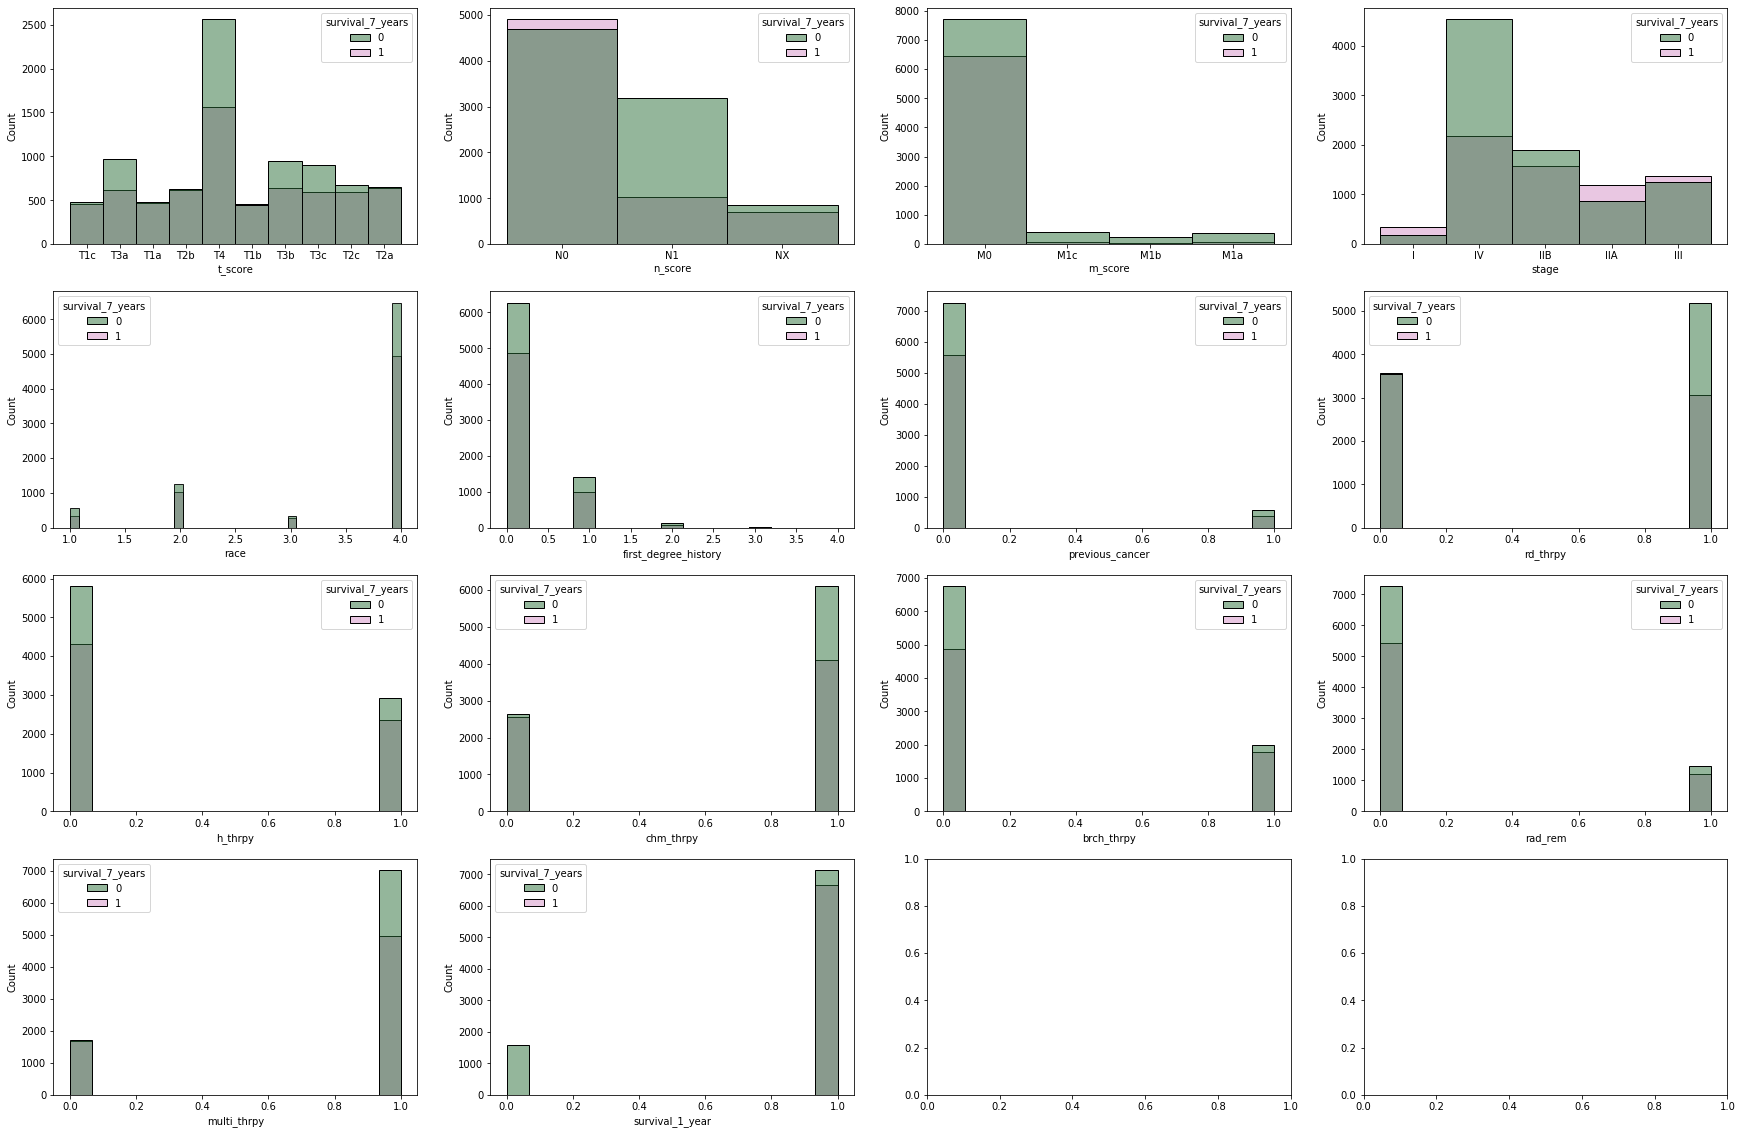

In [126]:
fig, ax =plt.subplots(4,4, figsize=(30,20))
sns.histplot(x=df['t_score'], hue=df['survival_7_years'], fill=True, common_norm=False, palette="cubehelix",ax=ax[0,0])
sns.histplot(x=df['n_score'], hue=df['survival_7_years'], fill=True, common_norm=False, palette="cubehelix",ax=ax[0,1])
sns.histplot(x=df['m_score'], hue=df['survival_7_years'], fill=True, common_norm=False, palette="cubehelix",ax=ax[0,2])
sns.histplot(x=df['stage'], hue=df['survival_7_years'], fill=True, common_norm=False, palette="cubehelix",ax=ax[0,3])
sns.histplot(x=df['race'], hue=df['survival_7_years'], fill=True, common_norm=False, palette="cubehelix",ax=ax[1,0])
sns.histplot(x=df['first_degree_history'], hue=df['survival_7_years'], fill=True, common_norm=False, palette="cubehelix",ax=ax[1,1])
sns.histplot(x=df['previous_cancer'], hue=df['survival_7_years'], fill=True, common_norm=False, palette="cubehelix",ax=ax[1,2])
sns.histplot(x=df['rd_thrpy'], hue=df['survival_7_years'], fill=True, common_norm=False, palette="cubehelix",ax=ax[1,3])
sns.histplot(x=df['h_thrpy'], hue=df['survival_7_years'], fill=True, common_norm=False, palette="cubehelix",ax=ax[2,0])
sns.histplot(x=df['chm_thrpy'], hue=df['survival_7_years'], fill=True, common_norm=False, palette="cubehelix",ax=ax[2,1])
sns.histplot(x=df['brch_thrpy'], hue=df['survival_7_years'], fill=True, common_norm=False, palette="cubehelix",ax=ax[2,2])
sns.histplot(x=df['rad_rem'], hue=df['survival_7_years'], fill=True, common_norm=False, palette="cubehelix",ax=ax[2,3])
sns.histplot(x=df['multi_thrpy'], hue=df['survival_7_years'], fill=True, common_norm=False, palette="cubehelix",ax=ax[3,0])
sns.histplot(x=df['survival_1_year'], hue=df['survival_7_years'], fill=True, common_norm=False, palette="cubehelix",ax=ax[3,1])

plt.savefig('histplots7.png')

## Stages:

In [127]:
#Get a table thats grouped by stages:## Symptoms study:
stages = df.groupby('stage').agg('mean')
stages

,gleason_score,age,height,weight,tumor_diagnosis,tumor_6_months,tumor_1_year,psa_diagnosis,psa_6_months,psa_1_year,tea,BMI,u_symptom,s_symptom,p_symptom,o_symptom
stage,,,,,,,,,,,,,,,,
I,5.14,76.76,69.13,176.87,44.83,25.90,19.93,7.05,4.22,3.08,2.49,0.04,4.20,4.35,0.00,1.90
IIA,5.94,76.28,69.17,176.76,46.54,32.06,28.81,12.05,9.85,8.52,2.61,0.04,4.50,4.32,0.00,1.74
IIB,8.30,77.17,69.14,177.13,50.99,43.01,44.69,11.94,10.36,9.91,2.54,0.04,4.47,4.52,0.00,1.71
III,7.38,76.96,69.18,176.63,50.00,41.14,39.68,12.00,10.24,9.54,2.58,0.04,4.62,4.31,0.00,1.58
IV,7.34,76.94,69.15,176.70,49.99,39.83,38.90,11.72,9.88,9.23,2.54,0.04,4.43,4.36,0.26,2.47


/Applications/anaconda/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.4 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Applications/anaconda/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.4 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Applications/anaconda/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.4 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Applications/anaconda/anaconda3/lib/python3.7/site-packages/

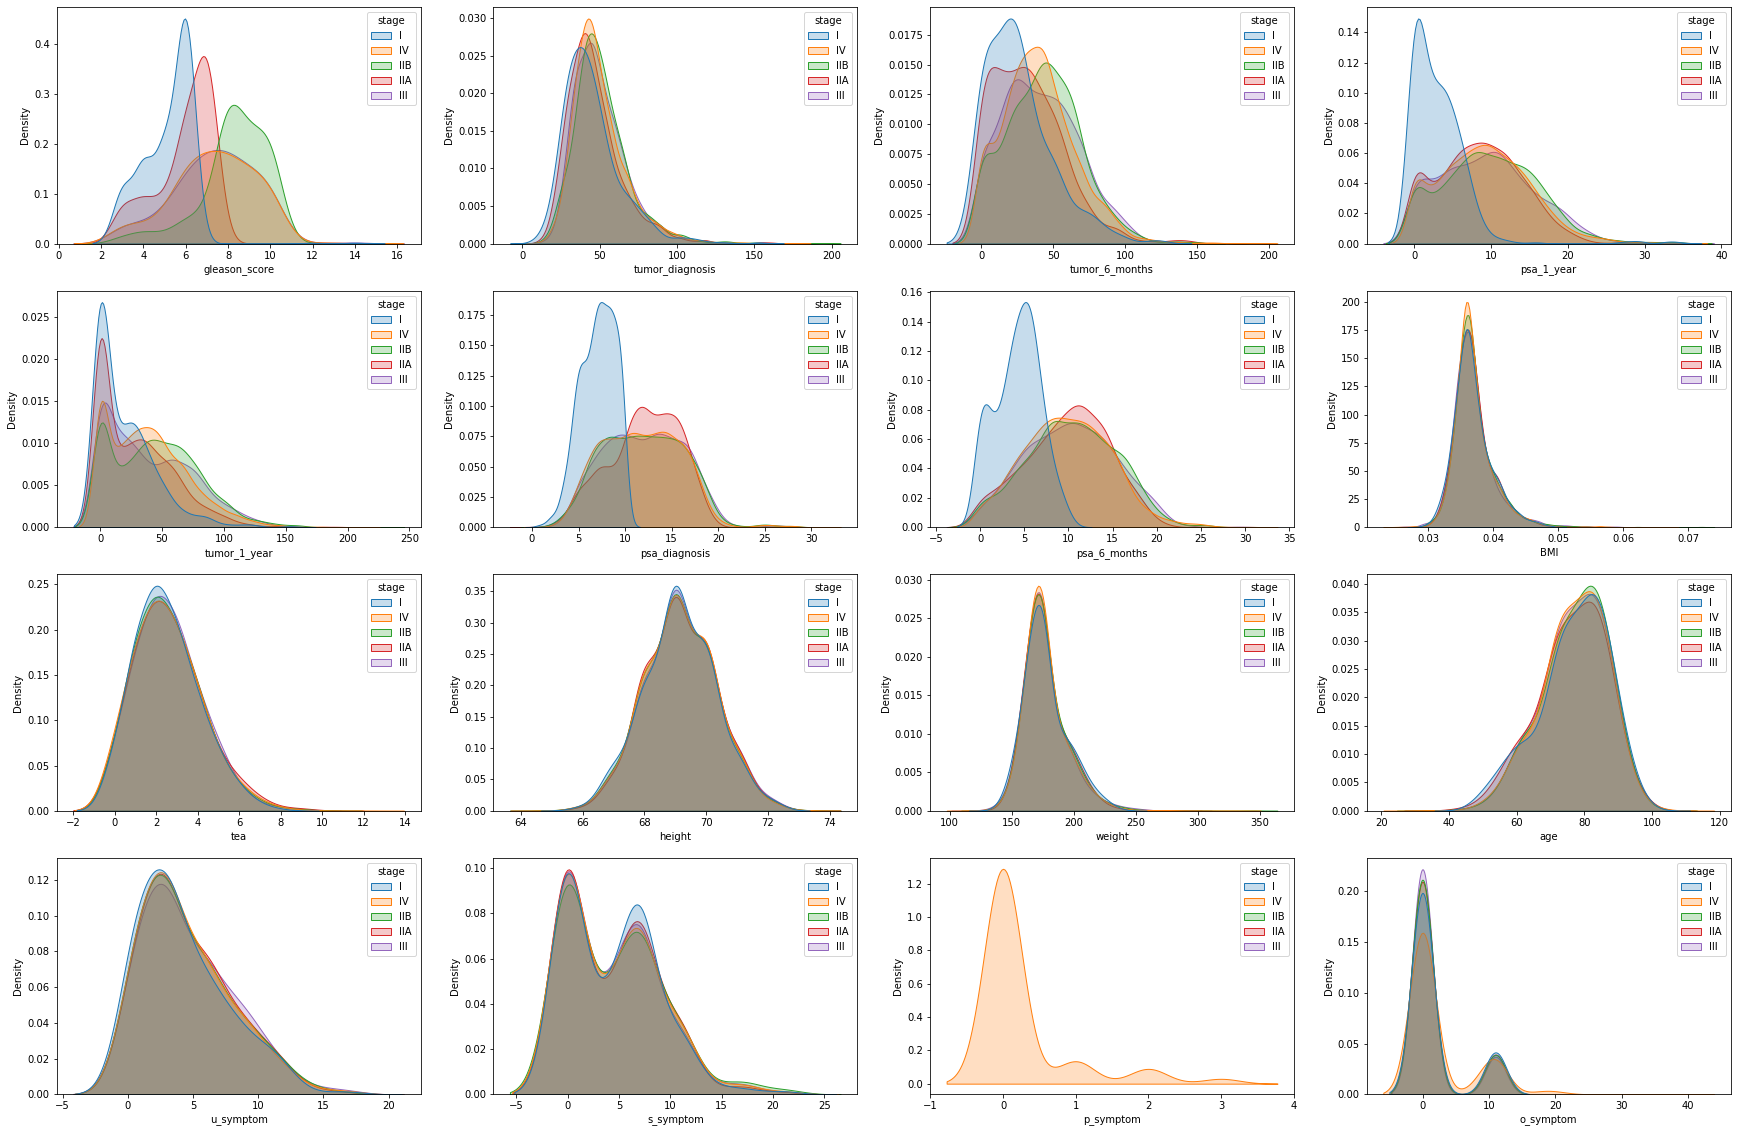

In [128]:
fig, ax =plt.subplots(4,4, figsize=(30,20))
sns.kdeplot(data=df ,x='gleason_score', hue=df['stage'], fill=True, common_norm=False, palette="tab10", bw=0.4,ax=ax[0,0])
sns.kdeplot(data=df ,x='tumor_diagnosis', hue=df['stage'], fill=True, common_norm=False, palette="tab10",ax=ax[0,1])
sns.kdeplot(data=df ,x='tumor_6_months', hue=df['stage'], fill=True, common_norm=False, palette="tab10",ax=ax[0,2])
sns.kdeplot(data=df ,x='tumor_1_year', hue=df['stage'], fill=True, common_norm=False, palette="tab10",ax=ax[1,0])
sns.kdeplot(data=df ,x='psa_diagnosis', hue=df['stage'], fill=True, common_norm=False, palette="tab10",ax=ax[1,1])
sns.kdeplot(data=df ,x='psa_6_months', hue=df['stage'], fill=True, common_norm=False, palette="tab10",ax=ax[1,2])
sns.kdeplot(data=df ,x='psa_1_year', hue=df['stage'], fill=True, common_norm=False, palette="tab10",ax=ax[0,3])
sns.kdeplot(data=df ,x='BMI', hue=df['stage'], fill=True, common_norm=False, palette="tab10",ax=ax[1,3])
sns.kdeplot(data=df ,x='tea', hue=df['stage'], fill=True, common_norm=False, palette="tab10", bw=0.4, ax=ax[2,0])
sns.kdeplot(data=df ,x='height', hue=df['stage'], fill=True, common_norm=False, palette="tab10", bw=0.4,ax=ax[2,1])
sns.kdeplot(data=df ,x='weight', hue=df['stage'], fill=True, common_norm=False, palette="tab10", bw=0.4,ax=ax[2,2])
sns.kdeplot(data=df ,x='age', hue=df['stage'], fill=True, common_norm=False, palette="tab10", bw=0.4,ax=ax[2,3])

sns.kdeplot(data=df ,x='u_symptom', hue=df['stage'], fill=True, common_norm=False, palette="tab10", bw=0.4,ax=ax[3,0])
sns.kdeplot(data=df ,x='s_symptom', hue=df['stage'], fill=True, common_norm=False, palette="tab10", bw=0.4,ax=ax[3,1])
sns.kdeplot(data=df ,x='p_symptom', hue=df['stage'], fill=True, common_norm=False, palette="tab10", bw=0.4,ax=ax[3,2])
sns.kdeplot(data=df ,x='o_symptom', hue=df['stage'], fill=True, common_norm=False, palette="tab10", bw=0.4,ax=ax[3,3])
plt.savefig('kdeplotsStage.png')

In [570]:
print("following categorical variables are significant:")
for x in stages.columns:
    p = stats.f_oneway(df[df['stage']=='I'][x].dropna(), df[df['stage']=='IIA'][x].dropna(),
       df[df['stage']=='IIB'][x].dropna(),df[df['stage']=='III'][x].dropna(),
       df[df['stage']=='IV'][x].dropna()).pvalue
    if p < 0.05:
        print(x,p)

following categorical variables are significant:
gleason_score 0.0
age 0.026502028098301735
tumor_diagnosis 4.826524507604186e-25
tumor_6_months 4.323545893579891e-29
tumor_1_year 3.942493479486085e-94
psa_diagnosis 1.2821863665367432e-140
psa_6_months 2.0850188363275988e-60
psa_1_year 3.103786358194037e-120
u_symptom 0.043867161189596715
p_symptom 1.3676185648204184e-284
o_symptom 1.9475031625925114e-25


In [571]:
print("following categorical variables are significant:")
for column in df.select_dtypes('object').drop(['symptoms','diagnosis_date','stage'],axis=1).columns:
    p = (stats.chi2_contingency(pd.crosstab(df[column], df['stage']).values))[1]
    if p <0.05:
        print(column)

        

following categorical variables are significant:
t_score
n_score
m_score
rd_thrpy
h_thrpy
chm_thrpy
cry_thrpy
brch_thrpy
rad_rem
multi_thrpy
survival_1_year
survival_7_years


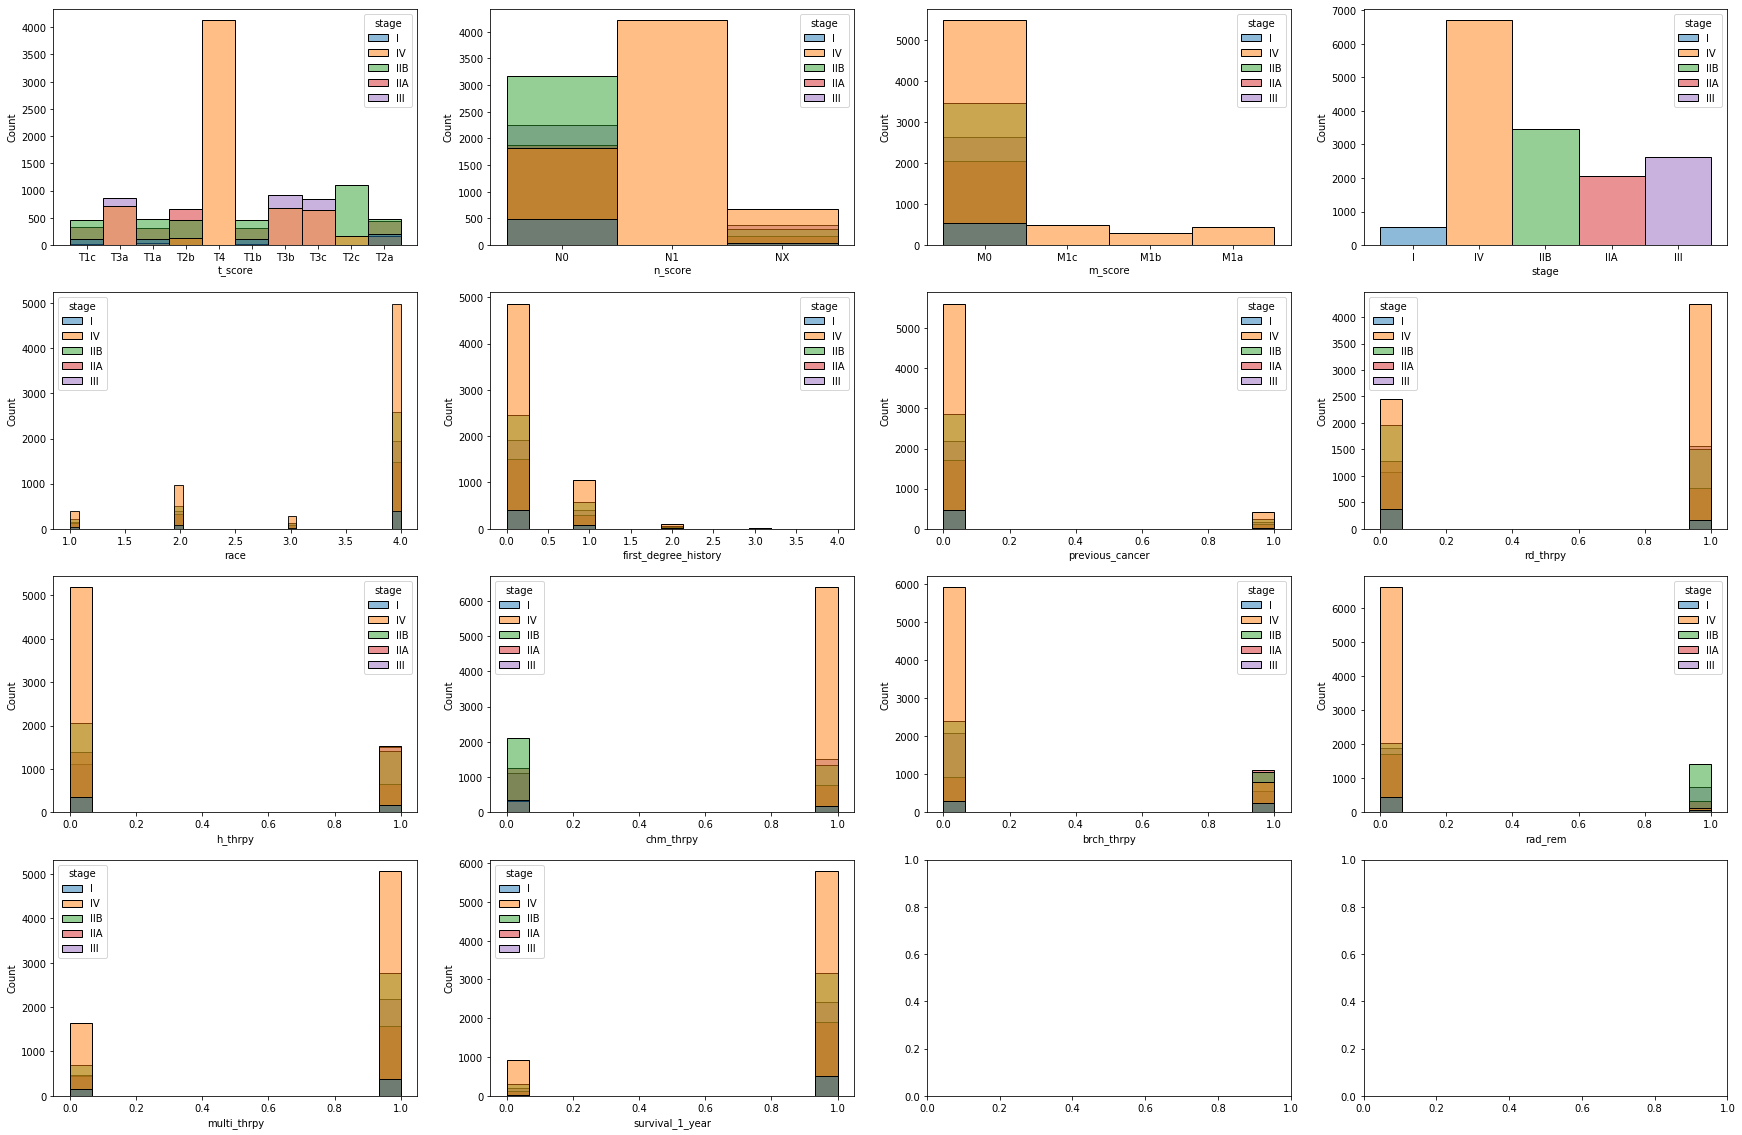

In [129]:
fig, ax =plt.subplots(4,4, figsize=(30,20))
sns.histplot(x=df['t_score'], hue=df['stage'], fill=True, common_norm=False, palette="tab10",ax=ax[0,0])
sns.histplot(x=df['n_score'], hue=df['stage'], fill=True, common_norm=False, palette="tab10",ax=ax[0,1])
sns.histplot(x=df['m_score'], hue=df['stage'], fill=True, common_norm=False, palette="tab10",ax=ax[0,2])
sns.histplot(x=df['stage'], hue=df['stage'], fill=True, common_norm=False, palette="tab10",ax=ax[0,3])
sns.histplot(x=df['race'], hue=df['stage'], fill=True, common_norm=False, palette="tab10",ax=ax[1,0])
sns.histplot(x=df['first_degree_history'], hue=df['stage'], fill=True, common_norm=False, palette="tab10",ax=ax[1,1])
sns.histplot(x=df['previous_cancer'], hue=df['stage'], fill=True, common_norm=False, palette="tab10",ax=ax[1,2])
sns.histplot(x=df['rd_thrpy'], hue=df['stage'], fill=True, common_norm=False, palette="tab10",ax=ax[1,3])
sns.histplot(x=df['h_thrpy'], hue=df['stage'], fill=True, common_norm=False, palette="tab10",ax=ax[2,0])
sns.histplot(x=df['chm_thrpy'], hue=df['stage'], fill=True, common_norm=False, palette="tab10",ax=ax[2,1])
sns.histplot(x=df['brch_thrpy'], hue=df['stage'], fill=True, common_norm=False, palette="tab10",ax=ax[2,2])
sns.histplot(x=df['rad_rem'], hue=df['stage'], fill=True, common_norm=False, palette="tab10",ax=ax[2,3])
sns.histplot(x=df['multi_thrpy'], hue=df['stage'], fill=True, common_norm=False, palette="tab10",ax=ax[3,0])
sns.histplot(x=df['survival_1_year'], hue=df['stage'], fill=True, common_norm=False, palette="tab10",ax=ax[3,1])

plt.savefig('histplotsStage.png')

### NA values



### 1. BMI

Looking at the data there are many Na values in weight and height. These rows have equall amount of fatality after 7 years. So droping them is not a good idea. Replace with averages. 

### 2. family hist, first degree and previous cancer:
Same rows has Na values. replace with 0. 

### 3. Tumor size: 
Three sizes. Get a rate of growth from other two available values to replace the missing values

$$tumor6months = tumor1year - 6\left( \frac{tumor 1 year-diagnosis}{12} \right)$$

### 3. Psa diagnosis: 
Three sizes. Get a rate of growth from other two available values to replace the missing values

$$psa6months = psa1year - 6\left( \frac{psa1year-psadiagnosis}{12} \right)$$

In [168]:
test['height']= test['height'].fillna(test['height'].mean())
test['weight']=test['weight'].fillna(test['weight'].mean())
test['BMI'] = test['weight']/(test['height'] * test['height'])
test['family_history'] = test['family_history'].fillna("0")
test['first_degree_history'] = test['first_degree_history'].fillna("0")
test['previous_cancer'] = test['previous_cancer'].fillna("0")
test['smoker'] = test['smoker'].fillna("0")
test['age']= test['height'].fillna(test['age'].mean())

test['tumor_6_months'] = test['tumor_6_months'].fillna((test['tumor_1_year'] - ((test['tumor_1_year']-test['tumor_diagnosis'])/2)))
test['tumor_1_year'] = test['tumor_1_year'].fillna((test['tumor_6_months'] + ((test['tumor_6_months']-test['tumor_diagnosis']))))
test['tumor_diagnosis'] = test['tumor_diagnosis'].fillna((test['tumor_6_months'] - ((test['tumor_1_year']-test['tumor_6_months']))))

test['psa_6_months'] = test['psa_6_months'].fillna((test['psa_1_year'] - ((test['psa_1_year']-test['psa_diagnosis'])/2)))
test['psa_1_year'] = test['psa_1_year'].fillna((test['psa_6_months'] + ((test['psa_6_months']-test['psa_diagnosis']))))
test['psa_diagnosis'] = test['psa_diagnosis'].fillna((test['psa_6_months'] - ((test['psa_1_year']-test['psa_6_months']))))

#drop
test = test.drop(['diagnosis_date','symptoms','tea','height','weight'],axis=1)
#test = test.dropna()
test = test.fillna(0)

KeyError: 'height'

In [187]:
test = test.fillna(0)

In [7]:
df['height']= df['height'].fillna(df['height'].mean())
df['weight']=df['weight'].fillna(df['weight'].mean())
df['BMI'] = df['weight']/(df['height'] * df['height'])
df['family_history'] = df['family_history'].fillna("0")
df['first_degree_history'] = df['first_degree_history'].fillna("0")
df['previous_cancer'] = df['previous_cancer'].fillna("0")
df['smoker'] = df['smoker'].fillna("0")

df['tumor_6_months'] = df['tumor_6_months'].fillna((df['tumor_1_year'] - ((df['tumor_1_year']-df['tumor_diagnosis'])/2)))
df['tumor_1_year'] = df['tumor_1_year'].fillna((df['tumor_6_months'] + ((df['tumor_6_months']-df['tumor_diagnosis']))))
df['tumor_diagnosis'] = df['tumor_diagnosis'].fillna((df['tumor_6_months'] - ((df['tumor_1_year']-df['tumor_6_months']))))

df['psa_6_months'] = df['psa_6_months'].fillna((df['psa_1_year'] - ((df['psa_1_year']-df['psa_diagnosis'])/2)))
df['psa_1_year'] = df['psa_1_year'].fillna((df['psa_6_months'] + ((df['psa_6_months']-df['psa_diagnosis']))))
df['psa_diagnosis'] = df['psa_diagnosis'].fillna((df['psa_6_months'] - ((df['psa_1_year']-df['psa_6_months']))))

#drop
df = df.drop(['diagnosis_date','symptoms','tea','height','weight'],axis=1)
df = df.dropna()

In [8]:
print("percentage of missing gleason score is", len(df[df['gleason_score'].isna()]) / len(df) *100)
print("percentage of missing tumor diag is", len(df[df['tumor_diagnosis'].isna()]) / len(df) *100)
print("percentage of missing tumor 6 month is", len(df[df['tumor_6_months'].isna()]) / len(df) *100)
print("percentage of missing tumor 1 year is", len(df[df['tumor_1_year'].isna()]) / len(df) *100)
print("percentage of missing psa diagonosis  is", len(df[df['psa_diagnosis'].isna()]) / len(df) *100)
print("percentage of missing psa diagonosis 6 months is", len(df[df['psa_6_months'].isna()]) / len(df) *100)
print("percentage of missing psa diagonosis 1 year is", len(df[df['psa_1_year'].isna()]) / len(df) *100)


#print("percentage of weight score is", len(df[df['weight'].isna()]) / len(df) *100)
#print("percentage of heght score is", len(df[df['height'].isna()]) / len(df) *100)
print("percentage of age score is", len(df[df['age'].isna()]) / len(df) *100)

percentage of missing gleason score is 0.0
percentage of missing tumor diag is 0.0
percentage of missing tumor 6 month is 0.0
percentage of missing tumor 1 year is 0.0
percentage of missing psa diagonosis  is 0.0
percentage of missing psa diagonosis 6 months is 0.0
percentage of missing psa diagonosis 1 year is 0.0
percentage of age score is 0.0


In [143]:
print("percentage of missing gleason score is", len(test[test['gleason_score'].isna()]) / len(test) *100)
print("percentage of missing tumor diag is", len(test[test['tumor_diagnosis'].isna()]) / len(test) *100)
print("percentage of missing tumor 6 month is", len(test[test['tumor_6_months'].isna()]) / len(test) *100)
print("percentage of missing tumor 1 year is", len(test[test['tumor_1_year'].isna()]) / len(test) *100)
print("percentage of missing psa diagonosis  is", len(test[test['psa_diagnosis'].isna()]) / len(test) *100)
print("percentage of missing psa diagonosis 6 months is", len(test[test['psa_6_months'].isna()]) / len(test) *100)
print("percentage of missing psa diagonosis 1 year is", len(test[test['psa_1_year'].isna()]) / len(test) *100)


#print("percentage of weight score is", len(test[test['weight'].isna()]) / len(test) *100)
#print("percentage of heght score is", len(test[test['height'].isna()]) / len(test) *100)
print("percentage of age score is", len(test[test['age'].isna()]) / len(test) *100)

percentage of missing gleason score is 2.0726736623016215
percentage of missing tumor diag is 1.2921689359118895
percentage of missing tumor 6 month is 9.999132772526234
percentage of missing tumor 1 year is 8.941115254531264
percentage of missing psa diagonosis  is 6.165987338478883
percentage of missing psa diagonosis 6 months is 14.586766108750327
percentage of missing psa diagonosis 1 year is 10.5801751799497
percentage of age score is 5.61963403000607


### Modelling



In [188]:
df_dum= pd.get_dummies(df, drop_first=True, dtype='int')
test_dum=pd.get_dummies(test,drop_first=True,dtype='int')

In [180]:
df_dum.columns

Index(['gleason_score', 'age', 'tumor_diagnosis', 'tumor_6_months',
       'tumor_1_year', 'psa_diagnosis', 'psa_6_months', 'psa_1_year', 'BMI',
       'u_symptom', 's_symptom', 'p_symptom', 'o_symptom', 't_score_T1b',
       't_score_T1c', 't_score_T2a', 't_score_T2b', 't_score_T2c',
       't_score_T3a', 't_score_T3b', 't_score_T3c', 't_score_T4', 'n_score_N1',
       'n_score_NX', 'm_score_M1a', 'm_score_M1b', 'm_score_M1c', 'stage_IIA',
       'stage_IIB', 'stage_III', 'stage_IV', 'race_2.0', 'race_3.0',
       'race_4.0', 'family_history_1.0', 'family_history_2.0',
       'family_history_3.0', 'family_history_4.0', 'family_history_5.0',
       'family_history_0', 'first_degree_history_1.0',
       'first_degree_history_2.0', 'first_degree_history_3.0',
       'first_degree_history_4.0', 'first_degree_history_0',
       'previous_cancer_1.0', 'previous_cancer_0', 'smoker_1.0', 'smoker_0',
       'side_left', 'side_right', 'rd_thrpy_1', 'h_thrpy_1', 'chm_thrpy_1',
       'cry_thrpy_

In [189]:
test_dum = test_dum.rename(columns={'survival_1_year_1.0':'survival_1_year_1'})

In [20]:
df = df.drop(['side','smoker','family_history'], axis=1)

In [190]:
from sklearn.model_selection import train_test_split


X_train = df_dum.drop('survival_7_years_1',axis=1)
y_train = df_dum['survival_7_years_1']
X_test= test_dum
"""X_train, X_test, y_train, y_test = train_test_split(df_dum.drop('survival_7_years_1',axis=1), 
                                                    df_dum['survival_7_years_1'], test_size=0.30, 
                                                    random_state=101)"""

'''X_train, X_test, y_train, y_test = train_test_split(df.drop('survival_7_years',axis=1), 
                                                    df['survival_7_years'], test_size=0.30, 
                                                    random_state=101)'''

"X_train, X_test, y_train, y_test = train_test_split(df.drop('survival_7_years',axis=1), \n                                                    df['survival_7_years'], test_size=0.30, \n                                                    random_state=101)"

### 1. Logistic Regression: 

In [192]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix, roc_curve,roc_auc_score
#print(classification_report(y_test,predictions))
'''cmap = sns.diverging_palette(220, 25, as_cmap=True)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictions)), annot=True,cmap=cmap,fmt='g',)
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('Logreg.png')'''

"cmap = sns.diverging_palette(220, 25, as_cmap=True)\nsns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictions)), annot=True,cmap=cmap,fmt='g',)\nplt.title('Confusion matrix', y=1.1)\nplt.ylabel('Actual label')\nplt.xlabel('Predicted label')\nplt.savefig('Logreg.png')"

In [194]:
pd.DataFrame(predictions).to_csv("pred.csv")

In [195]:
len(predictions)

11531

### Trees

0.6495188383660511 {'max_depth': 4} DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

           0       0.68      0.58      0.63      1891
           1       0.57      0.68      0.62      1584

    accuracy                           0.62      3475
   macro avg       0.63      0.63      0.62      3475
weighted avg       0.63      0.62      0.62      3475



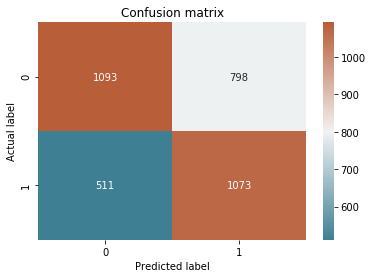

In [109]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X_train, y_train)
tree_model = clf.best_estimator_
tree_model.fit(X_train, y_train)
predictions = tree_model.predict(X_test)
print (clf.best_score_, clf.best_params_, clf.best_estimator_)
print(classification_report(y_test,predictions))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictions)), annot=True,cmap=cmap,fmt='g',)
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('Dtree.png')

### AdaBoost

0.6465572468624275 {'learning_rate': 1} AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=50, random_state=None)
              precision    recall  f1-score   support

           0       0.67      0.64      0.66      1891
           1       0.59      0.62      0.61      1584

    accuracy                           0.63      3475
   macro avg       0.63      0.63      0.63      3475
weighted avg       0.64      0.63      0.64      3475



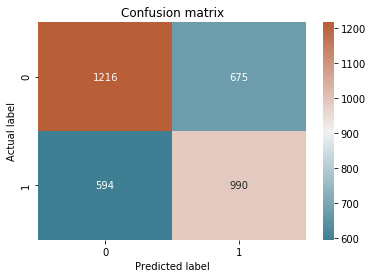

In [110]:
from sklearn.model_selection import GridSearchCV

parameters = {'learning_rate':range(0,3)}
clf = GridSearchCV(AdaBoostClassifier(), parameters, n_jobs=4)
clf.fit(X_train, y_train)
tree_model = clf.best_estimator_
tree_model.fit(X_train, y_train)
predictions = tree_model.predict(X_test)
print (clf.best_score_, clf.best_params_, clf.best_estimator_)
print(classification_report(y_test,predictions))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictions)), annot=True,cmap=cmap,fmt='g',)
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('ADA.png')

### Random forrest

0.6564274690008071 {'max_depth': 10} RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.67      0.63      0.65      1891
           1       0.59      0.63      0.61      1584

    accuracy                           0.63      3475
   macro avg       0.63      0.63      0.63      3475
weighted avg       0.64      0.63      0.63      3475



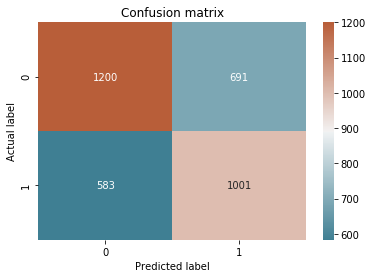

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {'max_depth': range(3,20),}
clf = GridSearchCV(RandomForestClassifier(), parameters, n_jobs=4)
clf.fit(X_train, y_train)
tree_model = clf.best_estimator_

tree_model.fit(X_train, y_train)
predictions = tree_model.predict(test)
print (clf.best_score_, clf.best_params_, clf.best_estimator_)
print(classification_report(y_test,predictions))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictions)), annot=True,cmap=cmap,fmt='g',)
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('RD.png')

### Neural Net

/Applications/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.6407594982926769 {'hidden_layer_sizes': 9, 'solver': 'adam'} MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=9, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
              precision    recall  f1-score   support

           0       0.70      0.57      0.63      1891
           1       0.58      0.71      0.64      1584

    accuracy                           0.63      3475
   macro avg       0.64      0.64      0.63      3475
weighted avg       0.64      0.63      0.63      3475



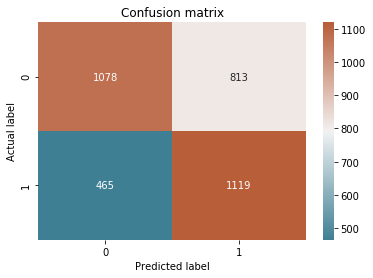

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

parameters = {'hidden_layer_sizes':range(2,10), 'solver':['lbfgs','sgd','adam']}
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=4)
clf.fit(X_train, y_train)
best_model = clf.best_estimator_

best_model.fit(X_train, y_train)
predictions = best_model.predict(X_test)
print (clf.best_score_, clf.best_params_, clf.best_estimator_)
print(classification_report(y_test,predictions))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictions)), annot=True,cmap=cmap,fmt='g',)
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('NN.png')

In [113]:
'''f, ax = plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(220, 25, as_cmap=True)
mask = np.triu(np.ones_like(df_dum.corr(), dtype=bool))
sns.heatmap(df_dum.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.savefig("corraltion.png")'''

'f, ax = plt.subplots(figsize=(30, 30))\ncmap = sns.diverging_palette(220, 25, as_cmap=True)\nmask = np.triu(np.ones_like(df_dum.corr(), dtype=bool))\nsns.heatmap(df_dum.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,\n            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)\nplt.savefig("corraltion.png")'

In [130]:
test = pd.read_csv('(sanyuja)_score.csv')

In [131]:
test

,id,diagnosis_date,gleason_score,t_score,n_score,m_score,stage,age,race,height,weight,family_history,first_degree_history,previous_cancer,smoker,side,tumor_diagnosis,tumor_6_months,tumor_1_year,psa_diagnosis,psa_6_months,psa_1_year,tea,symptoms,rd_thrpy,h_thrpy,chm_thrpy,cry_thrpy,brch_thrpy,rad_rem,multi_thrpy,survival_1_year,survival_7_years
0,20001,Oct-05,8.0,T3b,N0,M0,III,79.0,4.0,68.0,167.0,NaN,NaN,NaN,NaN,both,44.0,49.0,NaN,NaN,8.5,NaN,NaN,"U01,U02,S10",1,1,1,0,0,0,1,NaN,NaN
1,20002,Jun-02,10.0,T2c,N0,M0,IIB,84.0,2.0,70.0,169.0,0.0,0.0,0.0,0.0,both,93.0,NaN,109.0,7.0,NaN,8.2,2.0,"U01,U02,S07",1,0,0,1,0,0,1,NaN,NaN
2,20003,Mar-04,6.0,T4,N0,M0,IV,NaN,4.0,68.0,160.0,0.0,0.0,0.0,0.0,both,35.0,NaN,24.0,9.6,NaN,6.3,4.0,"U06,S07,O11",0,0,1,1,0,0,1,NaN,NaN
3,20004,Oct-03,7.0,T4,N1,M1a,IV,73.0,4.0,69.0,164.0,0.0,0.0,0.0,0.0,left,40.0,NaN,NaN,5.3,NaN,NaN,1.0,"S07,P03",1,0,1,0,1,0,1,0.0,NaN
4,20005,Mar-06,6.0,T1b,N0,M0,IIA,81.0,1.0,69.0,NaN,0.0,0.0,0.0,0.0,left,53.0,NaN,31.0,10.0,NaN,4.2,1.0,"U01,U03,U06,O11",0,0,1,1,0,0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11526,31527,Sep-06,10.0,T4,N1,M0,IV,80.0,4.0,70.0,199.0,NaN,NaN,NaN,NaN,both,68.0,64.0,68.0,24.0,23.6,24.1,NaN,"U01,U02,U06,S07",0,1,1,1,0,0,1,1.0,NaN
11527,31528,Nov-02,7.0,T4,N1,M0,IV,73.0,3.0,69.0,165.0,0.0,0.0,0.0,0.0,both,43.0,NaN,18.0,8.8,NaN,3.5,1.0,"U01,U02,U03,U06",0,1,1,0,0,0,1,1.0,NaN
11528,31529,Oct-02,10.0,T4,N0,M0,IV,62.0,4.0,NaN,213.0,0.0,0.0,0.0,0.0,both,61.0,58.0,63.0,12.3,10.4,10.3,1.0,"U01,U03,U05,S04",1,0,1,0,0,0,1,1.0,NaN
11529,31530,Nov-01,10.0,T1a,N0,M0,IIB,78.0,4.0,67.0,149.0,0.0,0.0,0.0,0.0,both,60.0,NaN,53.0,14.4,NaN,10.8,6.0,U02,1,1,1,1,0,1,1,NaN,NaN


In [12]:
df

,id,gleason_score,t_score,n_score,m_score,stage,age,race,family_history,first_degree_history,previous_cancer,smoker,side,tumor_diagnosis,tumor_6_months,tumor_1_year,psa_diagnosis,psa_6_months,psa_1_year,rd_thrpy,h_thrpy,chm_thrpy,cry_thrpy,brch_thrpy,rad_rem,multi_thrpy,survival_1_year,survival_7_years,BMI
0,1,4.0,T1c,N0,M0,I,86.0,4.0,0.0,0.0,0.0,0.0,both,70.0,54.5,39.0,8.7,6.45,4.2,0,0,1,1,0,1,1,1,0,0.04
1,2,8.0,T3a,N1,M0,IV,66.0,2.0,0.0,0.0,0.0,1.0,both,43.0,28.0,16.0,13.7,9.80,7.5,1,1,1,0,0,0,1,1,0,0.04
2,3,9.0,T1a,N0,M0,IIB,84.0,4.0,0.0,0.0,0.0,0.0,right,51.0,70.0,89.0,16.0,15.90,18.5,1,1,0,0,1,1,1,1,1,0.04
5,6,3.0,T1a,N0,M0,IIA,75.0,4.0,0.0,0.0,0.0,0.0,left,47.0,54.5,62.0,12.3,11.90,12.7,0,0,0,0,1,0,0,1,1,0.03
6,7,8.0,T1b,N0,M0,IIB,85.0,4.0,1.0,1.0,0.0,0.0,right,29.0,14.5,0.0,4.4,2.55,0.7,1,0,0,1,1,0,1,1,0,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15377,15378,8.0,T2c,N0,M0,IIB,61.0,2.0,0.0,0.0,0.0,0.0,right,43.0,26.0,9.0,11.6,9.75,7.9,0,0,0,1,0,0,0,1,0,0.04
15380,15381,7.0,T3c,N0,M0,III,72.0,4.0,0.0,0.0,0.0,0.0,left,51.0,17.0,-17.0,8.5,2.40,-3.7,0,0,1,0,1,0,1,0,0,0.04
15381,15382,7.0,T4,N0,M0,IV,77.0,4.0,0.0,0.0,0.0,0.0,both,87.0,76.0,65.0,6.1,3.05,0.0,1,0,0,0,0,0,0,1,0,0.04
15383,15384,10.0,T4,N1,M1a,IV,79.0,4.0,0.0,0.0,0.0,0.0,left,28.0,35.0,42.0,14.0,12.30,12.6,0,1,1,1,1,0,1,1,0,0.04


### Cox regression



In [14]:
df= pd.read_csv("training_data.csv")

In [17]:
df.dtypes

id                    int64
diagnosis_date       object
gleason_score       float64
t_score              object
n_score              object
                     ...   
brch_thrpy            int64
rad_rem               int64
multi_thrpy           int64
survival_1_year       int64
survival_7_years      int64
Length: 33, dtype: object

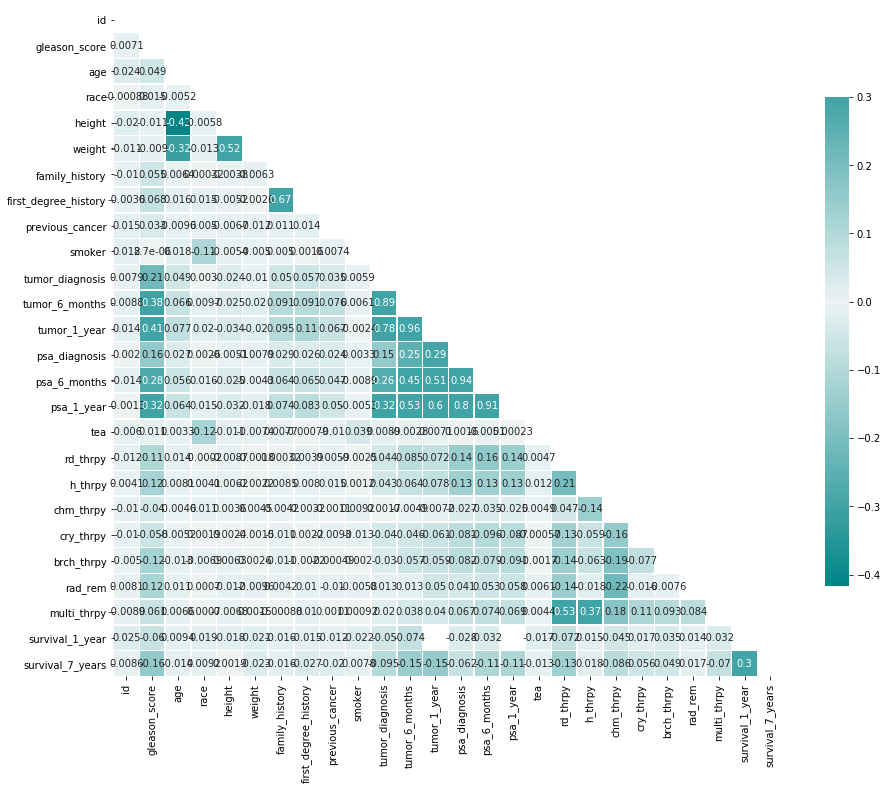

In [15]:
f, ax = plt.subplots(figsize=(15, 18))
cmap = sns.diverging_palette(195, 195, s=100, as_cmap=True)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
#plt.savefig("corraltion plot.png")